# Introduction

L'objectif de ce TP est de mettre en oeuvre les arbres de décision pour la classification et la régression. On utilisera pour cela la librairie `scikit-learn` de python, et on s'appuiera sur les fonctions de visualisation de la librairie `matplotlib`, au travers d'un certains nombres de fonction contenues dans le script `tp_arbres_source.py`.

# Première question : Mesure d'Homogénéité

Dans le cadre d'une régression, on peut proposer comme mesure d'homogénéité de la classification la minimisation de la variance intra-cluster , c'est a dire la maximisation de la variance inter-clusters, et donc la maximisation du $R^2$.

Si on note les clusters $C^k$ et les barycentre des clusters ${\bar y}^k$ , on a :

$$ H = \sum_k \sum_{y_i \in C^k} (y_i - {\bar y}^k)^2 $$

# Deuxième question : Variation de la profondeur maximale de l'arbre

##  Jeu de données :


On simule à l'aide de la fonction `rand_checkers` des échantillons de taille $n=456$ répartis en classes sous forme de damiers puis on affiche le jeu de données en utilisant la couleur pour représenté le cluster.


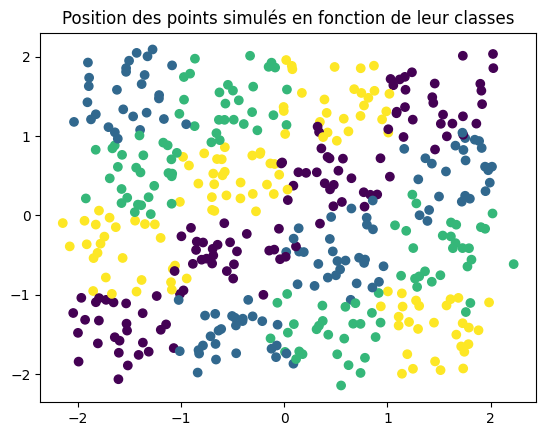

In [46]:
#| fig-cap: Jeu de données simulé
from numpy.random import seed
from tp_arbres_source import rand_checkers
import matplotlib.pyplot as plt

seed(1)
n = 456
n1 = n//4
n2 = n//4
n3 = n//4
n4 = n - n1 - n2 - n3 

dataset = rand_checkers(n1,n2,n3,n4)
plt.scatter(dataset[:,0], dataset[:,1], c=dataset[:,2])
plt.title('Position des points simulés en fonction de leur classes')
plt.show()

## Ajustement :

On ajuste ensuite 15 abres de décisions différents sur le jeu de données, en faisant varier les paramètres `max_depth` et `min_samples_split` et on affiche les erreurs obtenus.


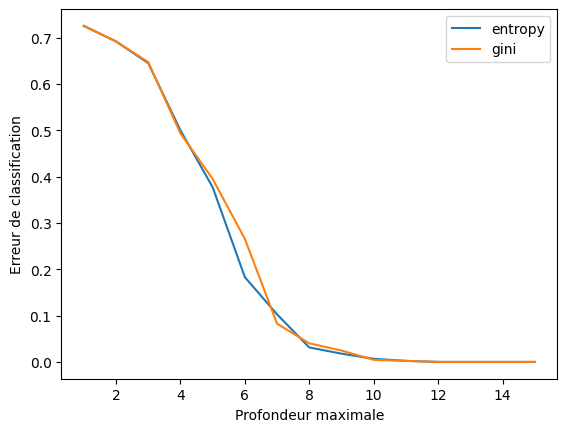

In [47]:
#| fig-cap: Ajustement d'arbres de décision de profondeur maximale variable
from sklearn import tree
m = 15

result_entropy = list()
result_gini = list()
for i in range(m) :
    classifier = tree.DecisionTreeClassifier(max_depth=i+1, min_samples_split=2, criterion='entropy')
    classifier.fit(dataset[:,0:2], dataset[:,2])
    result_entropy.append(1-classifier.score(dataset[:,0:2], dataset[:,2]))

    classifier = tree.DecisionTreeClassifier(max_depth=i+1, min_samples_split=2, criterion='gini')
    classifier.fit(dataset[:,0:2], dataset[:,2])
    result_gini.append(1-classifier.score(dataset[:,0:2], dataset[:,2]))

plt.plot(range(1,m+1), result_entropy, label='entropy')
plt.plot(range(1,m+1), result_gini, label='gini')
plt.xlabel('Profondeur maximale')
plt.ylabel('Erreur de classification')
plt.legend()
plt.show()

# Troisième question : Visualisation de la classsification obtenue

On va selectionner m=12 pour la valeur de `max_depth` qui minimise l'erreur, et on va représenter le classifieur obtenu en coloriant des points répartis équitablement dans [-2,2]x[-2,2] en fonction de la classe que le classifieur leur attribue :


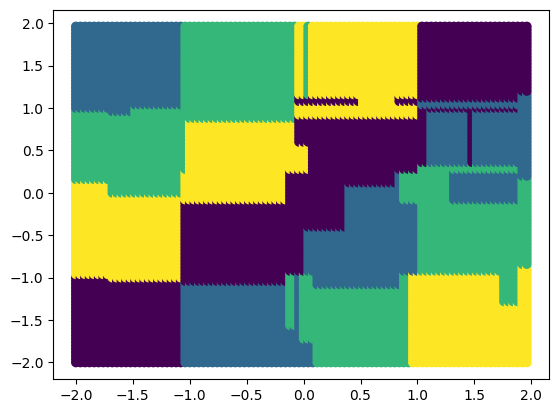

In [48]:
#| fig-cap: Classification obtenue avec un arbre de décision de profondeur maximale 12

import numpy as np

classifier = tree.DecisionTreeClassifier(max_depth=10, criterion='entropy')
classifier.fit(dataset[:,0:2], dataset[:,2])

def generator(i,j) :
  return np.array([(4*i/n)-2 ,(4*j/n)-2])

n = 100
X = np.fromfunction(generator, (n,n))
Xx = X[0,:,:].reshape(n*n,1)
Xy = X[1,:,:].reshape(n*n,1)
X = np.concatenate((Xx,Xy), axis=1)
Y = classifier.predict(X)

plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

# Quatrième question : Visualisons de l'arbre de décision :

On peut visualiser l'arbre de décision obtenu en utilisant la fonction `plot_tree` de la librairie `scikit-learn` :


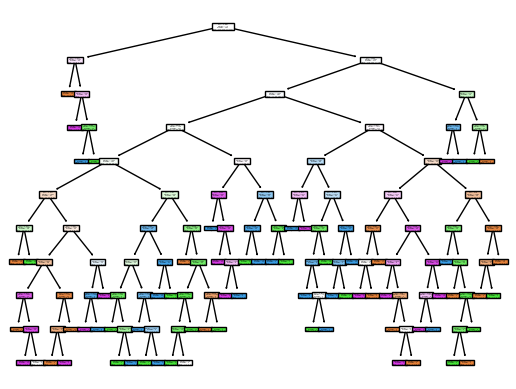

In [49]:
#| fig-cap: Arbre de décision obtenu avec une profondeur maximale 12
tree.plot_tree(classifier, filled=True, feature_names=['x1','x2']);
tree.export_graphviz(classifier, out_file='tree.dot', filled=True, feature_names=['x1','x2'])

# Cinquième question : Efficacité de l'arbre de décision sur un nouveau jeu de donnée 

On crée à nouveau un jeu de données avec la fonction `rand_checkers` et regarde l'erreur obtenue par l'arbre entrainé précedemment.


Score :  0.85


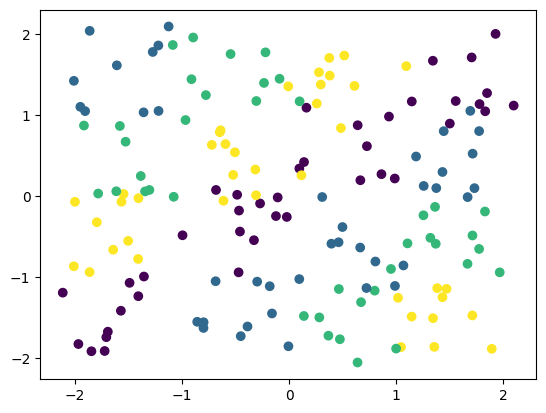

In [50]:
seed(1)
n=40
dataset_test = rand_checkers(n,n,n,n)
plt.scatter(dataset_test[:,0], dataset_test[:,1], c=dataset_test[:,2])

print("Score : ",classifier.score(dataset_test[:,0:2], dataset_test[:,2]))

On constate ici un score largemet inférieur au score fait sur l'echantillon d'entrainement , en effet on a seulement chercher à minimiser l'erreur d'entrainement sans se poser la question de la généralisation.

# Sixième question : Application au jeu de données Digits

## Jeu de données :

Nous téléchargons le jeu de données digits et nous le séparons en deux parties, une partie pour l'entrainement et une partie pour le test.


In [51]:
from sklearn.datasets import load_digits
digits = load_digits()
train_size = int(0.8 * len(digits.data))
train_x = digits.data[:train_size,:]
train_y = digits.target[:train_size]
test_x = digits.data[train_size:,:]
test_y = digits.target[train_size:]

print("Nombre de données d'entrainement : ", len(train_x))
print("Nombre de données de test : ", len(test_x))

Nombre de données d'entrainement :  1437
Nombre de données de test :  360


## Ajustement :

On ajuste ensuite 15 abres de décisions différents sur le jeu de données d'entrainement, en faisant varier les paramètres `max_depth` , et on regarde leur erreur sur le jeu de test :


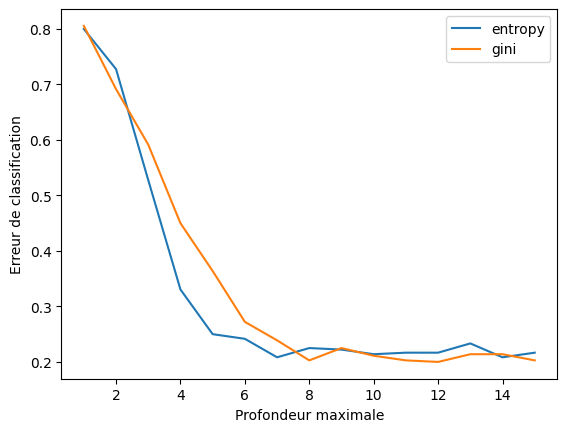

In [52]:
#|fig-cap: Ajustement d'arbres de décision de profondeur maximale variable sur le jeu de données digits

m = 15
result_entropy = list()
result_gini = list()

for i in range(m) :
    classifier = tree.DecisionTreeClassifier(max_depth=i+1,  criterion='entropy')
    classifier.fit(train_x, train_y)
    result_entropy.append(1-classifier.score(test_x, test_y))

    classifier = tree.DecisionTreeClassifier(max_depth=i+1,  criterion='gini')
    classifier.fit(train_x, train_y)
    result_gini.append(1-classifier.score(test_x, test_y))

plt.plot(range(1,m+1), result_entropy, label='entropy')
plt.plot(range(1,m+1), result_gini, label='gini')
plt.xlabel('Profondeur maximale')
plt.ylabel('Erreur de classification')
plt.legend()
plt.show()

On observe que l'erreur sur le jeu de test est minimale pour une profondeur maximale de 7 avec le critère d'entropie et 9 avec le critère de gini.

Exportons les deux arbres sous forme de fichier .dot :


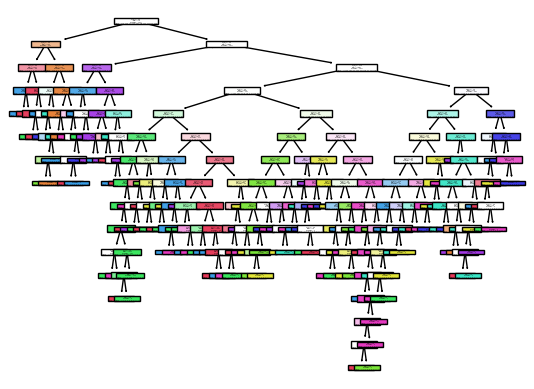

In [53]:
#|fig-cap: Arbre de décision obtenu avec une profondeur maximale 7 et le critère d'entropie
classifier_entropy = tree.DecisionTreeClassifier(max_depth=7, criterion='entropy')
classifier_entropy.fit(train_x, train_y)
tree.plot_tree(classifier, filled=True);
tree.export_graphviz(classifier, out_file='tree_entropy_depth7.dot', filled=True)

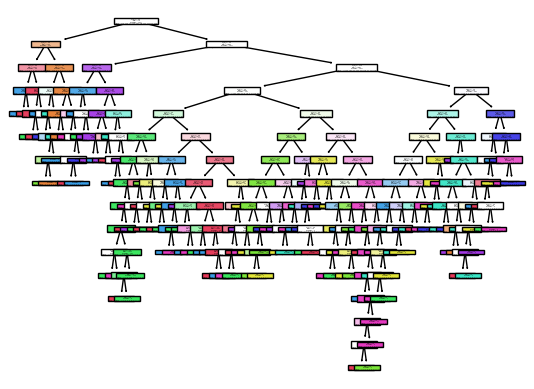

In [54]:
#|fig-cap: Arbre de décision obtenu avec une profondeur maximale 9 et le critère de gini

classifier_gini = tree.DecisionTreeClassifier(max_depth=9, criterion='gini')
classifier_gini.fit(train_x, train_y)
tree.plot_tree(classifier, filled=True);
tree.export_graphviz(classifier, out_file='tree_gini_depth9.dot', filled=True)

# Septième question : Validation croisée

On va maintenant appliquer une technique de validation croisée en 10 parties pour choisir la profondeur maximale de l'arbre de décision.


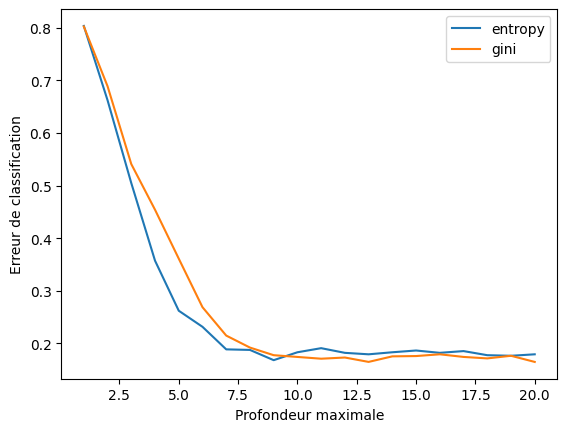

In [55]:
from sklearn.model_selection import cross_val_score
m = 20
k = 10

scores_entropy = list()
scores_gini = list()

for i in range(m) :
  classifier_entropy = tree.DecisionTreeClassifier(max_depth=i+1,criterion='entropy')
  classifier_gini = tree.DecisionTreeClassifier(max_depth=i+1,criterion='gini')
  scores_entropy.append(1- cross_val_score(classifier_entropy, digits.data, digits.target, cv=k).mean())
  scores_gini.append(1- cross_val_score(classifier_gini, digits.data, digits.target, cv=k).mean())

plt.plot(range(1,m+1), scores_entropy, label='entropy')
plt.plot(range(1,m+1), scores_gini, label='gini')
plt.xlabel('Profondeur maximale')
plt.ylabel('Erreur de classification')
plt.legend()
plt.show()

On s'appercoit que le score semble stagner à partir d'une profondeur maximale de 8 (que l'on va conserver pour avoir la complexité minimale du modèle), et que le critère d'entropie semble donner de meilleurs résultats.

# Huitième question : Courbe d'apprentissage

On va maintenant tracer la courbe d'apprentissage de l'arbre de décision obtenu avec une profondeur maximale de 8 et le critère d'entropie.


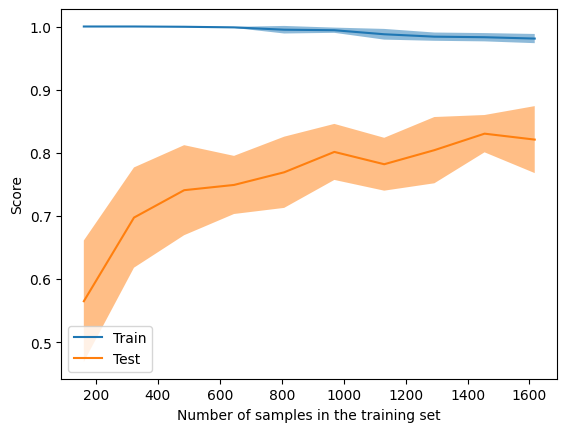

In [56]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay

classifier = tree.DecisionTreeClassifier(max_depth=8, criterion='entropy')
LearningCurveDisplay.from_estimator(classifier, digits.data, digits.target, cv=10, train_sizes=np.linspace(0.1, 1.0, 10))

L'erreur d'entrainement est toujours quasiment nulle et l'erreur de validation augmente et semble stagner au dessus du milier de données d'entrainement.